In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import check_random_state


def create_dataset_with_conditional_dependances(n_samples, random_state=None):
    rng = check_random_state(random_state)

    x_info_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))
    x_noise_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))

    x_info_low_card = x_info_high_card // 5
    x_noise_low_card = x_noise_high_card // 5

    rho = 0.2
    y = np.random.binomial(n=1, p=0.5 + rho * (2 * (x_info_low_card >= 2) - 1)).ravel()
    X = np.concatenate(
        (x_info_high_card, x_info_low_card, x_noise_high_card, x_noise_low_card), axis=1
    )
    return (X, y)


n_samples = 10000
n_experiments = 10

importances_ufi = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)
importances_mdi_oob = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)

for i in range(n_experiments):
    X, y = create_dataset_with_conditional_dependances(
        n_samples=n_samples, random_state=i
    )
    rf = RandomForestClassifier(random_state=i)
    rf.fit(X, y)
    importance_ufi = rf._compute_unbiased_feature_importance_and_oob_predictions(
        X, y, method="ufi"
    )[0]
    importances_ufi.loc[i] = importance_ufi
    importance_mdi_oob = rf._compute_unbiased_feature_importance_and_oob_predictions(
        X, y, method="mdi_oob"
    )[0]
    importances_mdi_oob.loc[i] = importance_mdi_oob

    print(importance_mdi_oob - importance_ufi)

[-0.00068381  0.00041177  0.00065489 -0.00038286]
[-0.00051818  0.00092057  0.00011121 -0.0005136 ]
[ 0.00082964  0.00063697 -0.00090944 -0.00055718]
[-0.00130195  0.00030611  0.00033234  0.00066349]
[ 0.00078352  0.00071129 -0.00073537 -0.00075943]
[-4.90049621e-04 -8.55078612e-04  1.43958095e-03 -9.44527187e-05]
[-0.00146885 -0.00020403  0.00116749  0.00050539]
[-0.00217948 -0.00093105  0.00289842  0.00021211]
[ 0.00024859  0.00208896 -0.00263966  0.0003021 ]
[-1.15248758e-03 -4.40461313e-04  1.58737419e-03  5.57469723e-06]


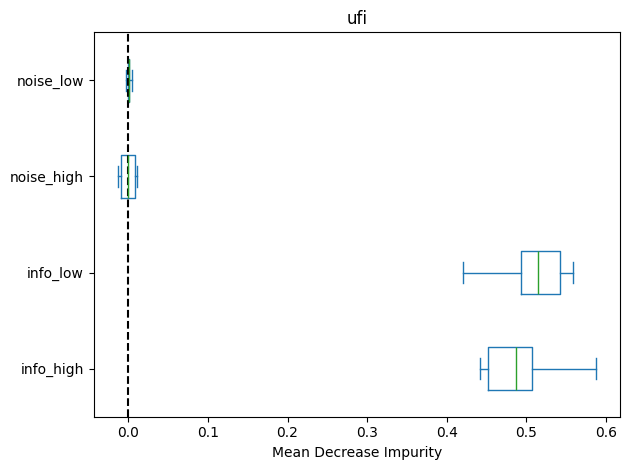

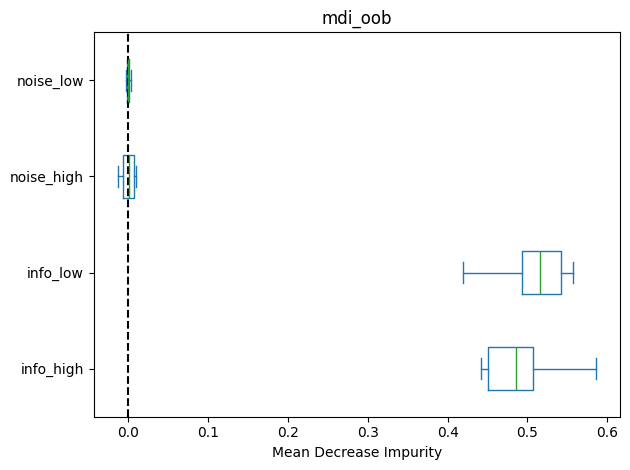

In [23]:
ax = importances_ufi.plot.box(vert=False, whis=10)
ax.set_title("ufi")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

ax = importances_mdi_oob.plot.box(vert=False, whis=10)
ax.set_title("mdi_oob")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

In [ ]:
# Check that high cardinality is not overly corrected


def create_dataset_with_equal_informative_and_varying_card(
    n_samples, random_state=None
):
    rng = check_random_state(random_state)

    x_info_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))
    x_noise_high_card = rng.choice(20, n_samples).reshape((n_samples, 1))

    x_info_low_card = rng.choice(4, n_samples).reshape((n_samples, 1))
    x_noise_low_card = rng.choice(4, n_samples).reshape((n_samples, 1))

    rho = 0.2
    y = np.random.binomial(
        n=1,
        p=0.5
        + rho * (2 * (x_info_low_card >= 2) - 1)
        + rho * (2 * (x_info_high_card >= 10) - 1),
    ).ravel()
    X = np.concatenate(
        (x_info_high_card, x_info_low_card, x_noise_high_card, x_noise_low_card), axis=1
    )
    return (X, y)


n_samples = 10000
n_experiments = 10

importances_ufi = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)
importances_mdi_oob = pd.DataFrame(
    columns=["info_high", "info_low", "noise_high", "noise_low"]
)

for i in range(n_experiments):
    X, y = create_dataset_with_equal_informative_and_varying_card(
        n_samples=n_samples, random_state=i
    )
    rf = RandomForestClassifier(random_state=i)
    rf.fit(X, y)
    importance_ufi = rf._compute_unbiased_feature_importance_and_oob_predictions(
        X, y, method="ufi"
    )[0]
    importances_ufi.loc[i] = importance_ufi
    importance_mdi_oob = rf._compute_unbiased_feature_importance_and_oob_predictions(
        X, y, method="mdi_oob"
    )[0]
    importances_mdi_oob.loc[i] = importance_mdi_oob

    print(importance_mdi_oob - importance_ufi)

[-0.00062622  0.00128831 -0.00120763  0.00054554]
[ 1.10639506e-03 -9.90020642e-05 -6.42371695e-04 -3.65021298e-04]
[-3.14093731e-04 -2.51347712e-03  2.76391946e-03  6.36513928e-05]
[ 0.00102211  0.00181514 -0.00217529 -0.00066196]
[ 2.50259808e-03 -2.15589536e-03 -3.99088230e-04  5.23855107e-05]
[ 0.00022615  0.00170806 -0.00134656 -0.00058765]
[ 0.00159527  0.0022246  -0.00431637  0.0004965 ]
[-0.00159782 -0.00127586  0.00253776  0.00033592]
[-0.00116777  0.00028311 -0.00036374  0.0012484 ]
[ 0.0019211   0.0001257  -0.00250844  0.00046164]


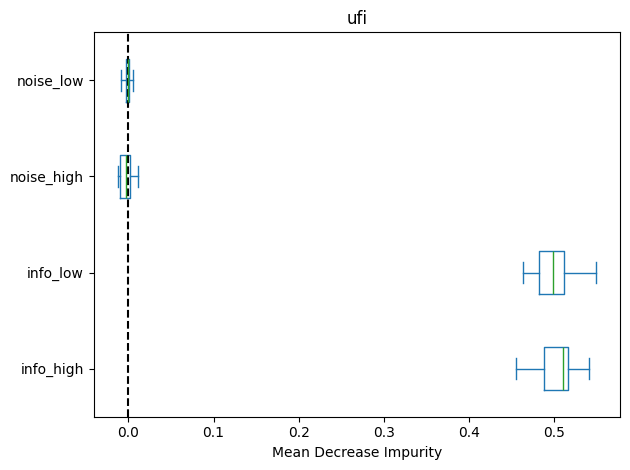

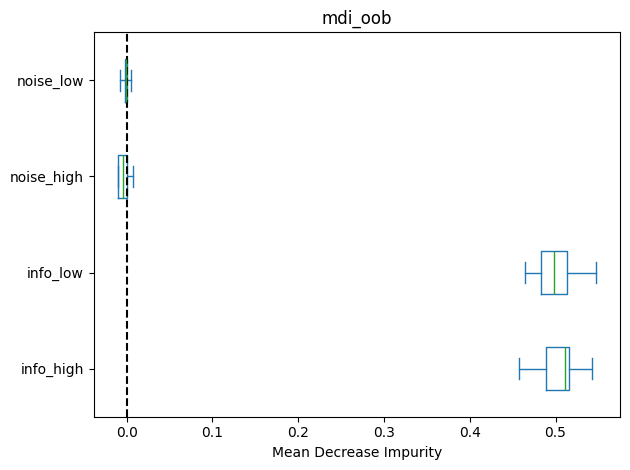

In [19]:
ax = importances_ufi.plot.box(vert=False, whis=10)
ax.set_title("ufi")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

ax = importances_mdi_oob.plot.box(vert=False, whis=10)
ax.set_title("mdi_oob")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Mean Decrease Impurity")
ax.figure.tight_layout()
plt.show()

In [ ]:
def gen_noise_cls(n, random_state=None, null=True):
    rng = check_random_state(random_state)
    x1 = rng.normal(size=n).reshape((n, 1))
    x2 = rng.choice(2, n).reshape((n, 1))
    x3 = rng.choice(4, n).reshape((n, 1))
    x4 = rng.choice(10, n).reshape((n, 1))
    x5 = rng.choice(20, n).reshape((n, 1))

    y = x2.copy()
    rho = 0.2 * (1 - null)
    flip_prob = (1 + rho) / 2
    flip_mask = rng.uniform(0, 1, size=y.shape) > flip_prob
    y[flip_mask] = 1 - y[flip_mask]

    y = y.ravel()

    X = np.concatenate((x1, x2, x3, x4, x5), axis=1)

    return [X, y]